In [8]:
import pandas as pd
from pandas_datareader import data as pd_data

# Designing a Trading Strategy based on trend and momentum-based indicators:

## Suport and Resistence Indicators:

In [44]:
start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
    goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
    print('File found...')
except FileNotFoundError:
    print('File Not Found! Downloading the data and creating the file...')
    goog_data2 = pd_data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data2.to_pickle(SRC_DATA_FILENAME)

File found...


In [49]:
goog_data = goog_data2.tail(620) # pick the 620 most recent observations
lows = goog_data["Low"]
highs = goog_data["High"]

#print(lows.head(),"\n\n")
#print(highs.head())
goog_data.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-17,674.468018,645.000000,649.000000,672.929993,11164900.0,672.929993
2015-07-20,668.880005,653.010010,659.239990,663.020020,5860900.0,663.020020
2015-07-21,673.000000,654.299988,655.210022,662.299988,3377200.0,662.299988


In [19]:
import matplotlib.pyplot as plt

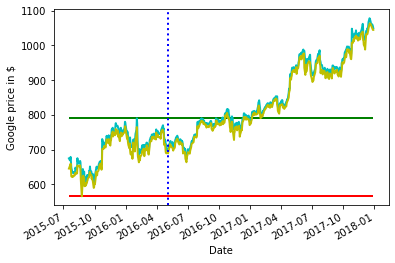

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')

highs.plot(ax=ax1, color='c', lw=2.)
lows.plot(ax=ax1, color='y', lw=2.)

plt.hlines(highs.head(200).max(), highs.index.values[0], highs.index.values[-1], linewidth=2, color='g')
plt.hlines(lows.head(200).min(), lows.index.values[0], lows.index.values[-1], linewidth=2, color='r')

plt.axvline(linewidth=2, color='b', x=lows.index.values[200], linestyle=':')

plt.show()

In our example, we can introduce two further parameters:
* The minimum number of times that a price needs to reach the support/resistance level.
* We will define the tolerance margin of what we consider being close to the support/resistance level.

In [45]:
import numpy as np

In [48]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal.tail(3)

""
Date
2017-12-27
2017-12-28
2017-12-29


In [50]:
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal.tail(3)

,price
Date,
2017-12-27,1049.369995
2017-12-28,1048.140015
2017-12-29,1046.400024
